In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
plt.style.use('fivethirtyeight')
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


from datetime import datetime
import dataframe_image as dfi
from statsmodels.tsa.seasonal import seasonal_decompose
import time
import glob
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score

In [2]:
%cd "/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/"

/Users/brendan/Desktop/Python/Hustle Projects/Airbnb


In [4]:
# function to download all listings data
def get_listings_lisbon_timeseries():
    """Function scraping all links to listings.csv files available on insideairbnb.com
    website, and saving downloaded files in a /data/raw-data folder.
    The files are named after their collection date (YYYY-MM.csv)."""
    soup = bs(requests.get('http://insideairbnb.com/get-the-data.html').content,'lxml')
    link_lst = [i['href'] for i in soup.select("td:contains('lisbon')+td>a[onclick*=listings]")]
    subfolder_names = ['raw-data']
    for subfolder_name in subfolder_names:
        os.makedirs(os.path.join('data4',subfolder_name))
    for link in link_lst:
        file = pd.read_csv(link)
        date = re.findall(r'20\d{2}-\d{2}',link)[0]
        file.to_csv(f'data4/raw-data/lisbon_{date}.csv',index=False)
get_listings_lisbon_timeseries()

NameError: name 'bs' is not defined

In [3]:
# pull in detailed_listings
raw_df_lisbon = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/lisbon/lisbon_detailed.csv')

print(f"The detailed listings dataset contains {len(raw_df_lisbon)} AirBnb listings.")
#print(f"The most recent listings dataset contains {len(lisbon_raw_df_11_4_2021)} Airbnb listings.")


The detailed listings dataset contains 18760 AirBnb listings.


In [4]:
lisbon_raw_df_12_12_2020 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/lisbon/lisbon_2020-12.csv')
lisbon_raw_df_12_12_2020.shape


(20141, 16)

In [5]:
# use magic commands 'cd' to change directory
# use glob to locate all files for lisbon
%cd "/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data1"
files_lisbon = glob.glob('lisbon/**.csv')
files_lisbon

/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data1


['lisbon/Lisbon_2021-05.csv',
 'lisbon/Lisbon_2021-04.csv',
 'lisbon/Lisbon_2021-10.csv',
 'lisbon/Lisbon_2021-06.csv',
 'lisbon/Lisbon_2021-07.csv',
 'lisbon/Lisbon_2021-03.csv',
 'lisbon/Lisbon_2021-02.csv',
 'lisbon/Lisbon_2021-01.csv',
 'lisbon/Lisbon_2020-12.csv',
 'lisbon/Lisbon_2021-09.csv',
 'lisbon/Lisbon_2021-08.csv']

In [6]:
# create individual dataframes for each file
# summarize each file (# of listings; avg price in euro)

lisbon_raw_df_12_12_2020 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/lisbon/lisbon_2020-12.csv')
print(f"The 12_12_2020 dataset contains {len(lisbon_raw_df_12_12_2020)} AirBnb listings; the avg price is €{round(lisbon_raw_df_12_12_2020['price'].mean(),2)}.")

lisbon_raw_df_1_9_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/lisbon/lisbon_2021-01.csv')
print(f"The 1_9_2021 dataset contains {len(lisbon_raw_df_1_9_2021)} AirBnb listings; the avg price is €{round(lisbon_raw_df_1_9_2021['price'].mean(),2)}.")

lisbon_raw_df_2_8_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/lisbon/lisbon_2021-02.csv')
print(f"The 2_8_2021 dataset contains {len(lisbon_raw_df_2_8_2021)} AirBnb listings; the avg price is €{round(lisbon_raw_df_2_8_2021['price'].mean(),2)}.")

lisbon_raw_df_3_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/lisbon/lisbon_2021-03.csv')
print(f"The 3_4_2021 dataset contains {len(lisbon_raw_df_3_4_2021)} AirBnb listings; the avg price is €{round(lisbon_raw_df_3_4_2021['price'].mean(),2)}.")

lisbon_raw_df_4_9_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/lisbon/lisbon_2021-04.csv')
print(f"The 4_9_2021 dataset contains {len(lisbon_raw_df_4_9_2021)} AirBnb listings; the avg price is €{round(lisbon_raw_df_4_9_2021['price'].mean(),2)}.")

#lisbon_raw_df_5_19_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/lisbon/lisbon_2021-05.csv')
#print(f"The 5_19_2021 dataset contains {len(lisbon_raw_df_5_19_2021)} AirBnb listings; the avg price is €{round(lisbon_raw_df_5_19_2021['price'].mean(),2)}.")

lisbon_raw_df_6_3_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/lisbon/lisbon_2021-06.csv')
print(f"The 6_3_2021 dataset contains {len(lisbon_raw_df_6_3_2021)} AirBnb listings; the avg price is €{round(lisbon_raw_df_6_3_2021['price'].mean(),2)}.")

lisbon_raw_df_7_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/lisbon/lisbon_2021-07.csv')
print(f"The 7_4_2021 dataset contains {len(lisbon_raw_df_7_4_2021)} AirBnb listings; the avg price is €{round(lisbon_raw_df_7_4_2021['price'].mean(),2)}.")

lisbon_raw_df_8_6_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/lisbon/lisbon_2021-08.csv')
print(f"The 8_6_2021 dataset contains {len(lisbon_raw_df_8_6_2021)} AirBnb listings; the avg price is €{round(lisbon_raw_df_8_6_2021['price'].mean(),2)}.")

lisbon_raw_df_9_7_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/lisbon/lisbon_2021-09.csv')
print(f"The 9_7_2021 dataset contains {len(lisbon_raw_df_9_7_2021)} AirBnb listings; the avg price is €{round(lisbon_raw_df_9_7_2021['price'].mean(),2)}.")

lisbon_raw_df_10_6_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/lisbon/lisbon_2021-10.csv')
print(f"The 10_6_2021 dataset contains {len(lisbon_raw_df_10_6_2021)} AirBnb listings; the avg price is €{round(lisbon_raw_df_10_6_2021['price'].mean(),2)}.")

#lisbon_raw_df_11_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/lisbon/lisbon_2021-11.csv')
#print(f"The 11_4_2021 dataset contains {len(lisbon_raw_df_11_4_2021)} AirBnb listings; the avg price is €{round(lisbon_raw_df_11_4_2021['price'].mean(),2)}.")


The 12_12_2020 dataset contains 20141 AirBnb listings; the avg price is €103.15.
The 1_9_2021 dataset contains 20057 AirBnb listings; the avg price is €96.05.
The 2_8_2021 dataset contains 19877 AirBnb listings; the avg price is €95.25.
The 3_4_2021 dataset contains 19804 AirBnb listings; the avg price is €95.45.
The 4_9_2021 dataset contains 19819 AirBnb listings; the avg price is €97.42.
The 6_3_2021 dataset contains 19281 AirBnb listings; the avg price is €106.87.
The 7_4_2021 dataset contains 19458 AirBnb listings; the avg price is €108.3.
The 8_6_2021 dataset contains 19339 AirBnb listings; the avg price is €110.56.
The 9_7_2021 dataset contains 19106 AirBnb listings; the avg price is €106.12.
The 10_6_2021 dataset contains 18761 AirBnb listings; the avg price is €104.58.


In [7]:
df_list_lisbon = [lisbon_raw_df_12_12_2020, lisbon_raw_df_1_9_2021, lisbon_raw_df_2_8_2021,
           lisbon_raw_df_3_4_2021, lisbon_raw_df_4_9_2021, lisbon_raw_df_6_3_2021, lisbon_raw_df_7_4_2021,
           lisbon_raw_df_8_6_2021, lisbon_raw_df_9_7_2021, lisbon_raw_df_10_6_2021]

dates_lisbon = ['12_12_2020', '01_9_2021', '02_08_2021','03_04_2021', '04_09_2021',
        '06_03_2021', '07_04_2021', '08_06_2021', '09_07_2021', '10_06_2021']

files_lisbon = ['2020-12', '2021-01', '2021-02', '2021-03', '2021-04',  '2021-06', '2021-07', '2021-08',
                  '2021-09', '2021-10']


df_final_lisbon = []

def airbnb_parse_lisbon(df_list, files):
    for file in files_lisbon:
        df_file = pd.read_csv(f"/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/data1/lisbon/lisbon_{file}.csv")
        print(f"The {file} lisbon dataset contains {len(df_file)} AirBnb listings -- the avg price is €{round(df_file['price'].mean(),2)}.")
        #print(f"The avg price per night out of {len(df_file)} listings is  ${round(df_file['price'].mean(),2)}.")


def airbnb_to_frame_lisbon(df_list, dates):
    for file in files_lisbon:
        df_file = pd.read_csv(f"/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/data1/lisbon/lisbon_{file}.csv")
        #print(f"The {date} Paris dataset contains {len(df_file)} AirBnb listings -- the avg price is ${round(df_file['price'].mean(),2)}.")
        df_final_lisbon.append(
        {
            'Date of scrape': file.replace('_', '/'),
            '# of Listings': len(df_file),
            'Avg Price': round(df_file['price'].mean(),2),
            'Median Price': round(df_file['price'].median(),2),
            'Min Price': df_file['price'].min(),
            'Max Price': df_file['price'].max(),
            'Avg reviews per month': round(df_file['reviews_per_month'].mean(),2)
        })
    
    return pd.DataFrame(df_final_lisbon)

lisbon_parse = airbnb_parse_lisbon(df_list_lisbon, files_lisbon)


The 2020-12 lisbon dataset contains 20141 AirBnb listings -- the avg price is €103.15.
The 2021-01 lisbon dataset contains 20057 AirBnb listings -- the avg price is €96.05.
The 2021-02 lisbon dataset contains 19877 AirBnb listings -- the avg price is €95.25.
The 2021-03 lisbon dataset contains 19804 AirBnb listings -- the avg price is €95.45.
The 2021-04 lisbon dataset contains 19819 AirBnb listings -- the avg price is €97.42.
The 2021-06 lisbon dataset contains 19281 AirBnb listings -- the avg price is €106.87.
The 2021-07 lisbon dataset contains 19458 AirBnb listings -- the avg price is €108.3.
The 2021-08 lisbon dataset contains 19339 AirBnb listings -- the avg price is €110.56.
The 2021-09 lisbon dataset contains 19106 AirBnb listings -- the avg price is €106.12.
The 2021-10 lisbon dataset contains 18761 AirBnb listings -- the avg price is €104.58.


In [8]:
lisbon_summary = airbnb_to_frame_lisbon(df_list_lisbon, files_lisbon)
lisbon_summary['Date of scrape'] = pd.to_datetime(lisbon_summary['Date of scrape'])
lisbon_summary['City'] = 'Lisbon'

dfi.export(lisbon_summary,"/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/lisbon/airbnb_lisbon_summary.png")


In [9]:
master_df_lisbon = pd.concat(df_list_lisbon)
master_df_lisbon_unique = master_df_lisbon.drop_duplicates(subset='id')
master_df_lisbon_unique.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,6499,Belém 1 Bedroom Historical Apartment,14455,Bruno,Lisboa,Belm,38.69750,-9.19768,Entire home/apt,79,3,26,2020-01-03,0.34,1,355,NaN,NaN
1,25659,Heart of Alfama - Coeur d'Alfama - Lisbon Center,107347,Ellie,Lisboa,Santa Maria Maior,38.71167,-9.12696,Entire home/apt,50,3,113,2019-12-08,1.39,1,363,NaN,NaN
2,29248,Apartamento Alfama com vista para o rio!,125768,Bárbara,Lisboa,Santa Maria Maior,38.71272,-9.12628,Entire home/apt,42,3,324,2020-11-01,2.67,1,348,NaN,NaN
3,29396,Alfama Hill - Boutique apartment,126415,Mónica,Lisboa,Santa Maria Maior,38.71156,-9.12987,Entire home/apt,36,2,260,2020-12-14,2.49,2,327,NaN,NaN
4,29915,Modern and Cool Apartment in Lisboa,128890,Sara,Lisboa,Avenidas Novas,38.74712,-9.15286,Entire home/apt,48,5,39,2020-12-17,0.31,1,270,NaN,NaN


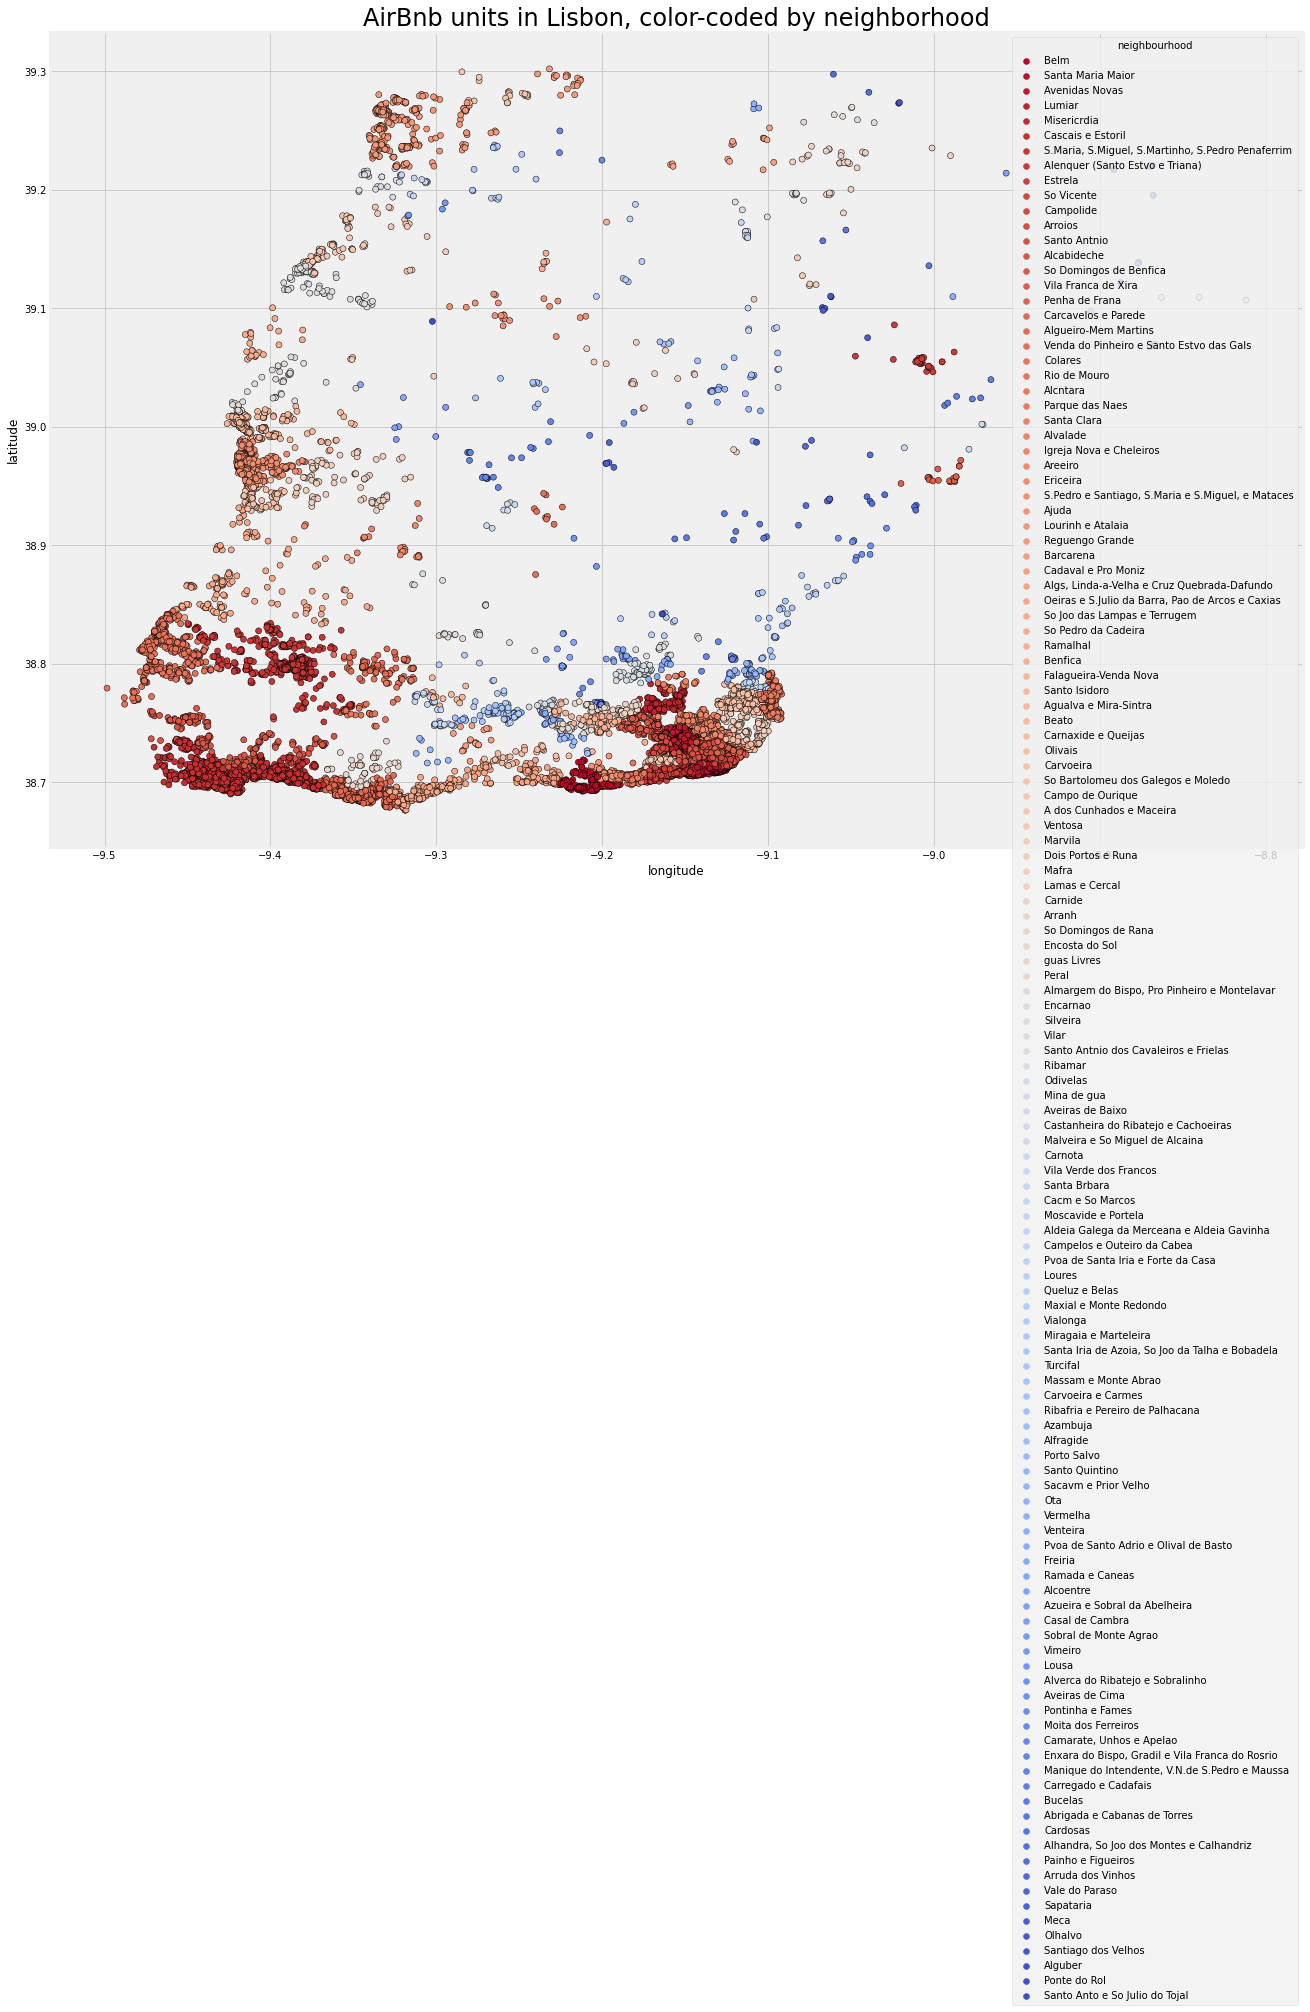

In [10]:
title = 'AirBnb units in Lisbon, color-coded by neighborhood'
plt.figure(figsize=(20,15))
#sns.set_palette("Paired_r")
sns.scatterplot(master_df_lisbon_unique.longitude, master_df_lisbon_unique.latitude, hue = master_df_lisbon_unique.neighbourhood, palette='coolwarm_r', edgecolor='black').set_title(title, fontsize=24)
plt.savefig('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/lisbon/airbnb_lisbon_map.png')
plt.show()

## Add review data through a join

In [11]:
df_reviews = pd.concat([lisbon_raw_df_10_6_2021,raw_df_lisbon],axis=1, join='outer')
df_reviews_ = df_reviews.loc[:,~df_reviews.columns.duplicated()]
df_reviews_ = df_reviews_[df_reviews_['accommodates'] <=6]
df_reviews_['accommodates'].value_counts()

2.0    5465
4.0    5406
6.0    2436
3.0    1681
5.0    1072
1.0     853
0.0       1
Name: accommodates, dtype: int64

## Regression

In [12]:
#df_reviews_.columns

In [13]:
df_regression = df_reviews_.copy()
df_regression_ = df_regression[['id', 'property_type', 'room_type', 'accommodates',
                               'bedrooms', 'beds', 'price', 'availability_90','review_scores_rating',
                               'review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value']]
df_regression_ = df_regression_[df_regression_['beds'].notna()]
df_regression_ = df_regression_[df_regression_['bedrooms'].notna()]
df_regression_['price'] = pd.to_numeric(df_regression_['price'])
df_regression_.isna().sum()

df_regression_=df_regression_.fillna(df_regression_.mean())

In [14]:
X_ = df_regression_[['accommodates', 'bedrooms','beds',
        'availability_90','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value']]

y = df_regression_['price'].replace({'\$':''}, regex = True)
Y = y.replace({',':''}, regex=True)

# with sklearn
regr = LinearRegression()
regr.fit(X_, Y)

print('Intercept: ', regr.intercept_)
print('Coefficients: ', regr.coef_)

print (regr)

Intercept:  -19.227115593421416
Coefficients:  [ 12.86546698   8.85016952  -2.03464122   0.21775526   4.65931381
  -5.03750224  10.59715057  15.44314922 -15.84346899]
LinearRegression()


In [15]:
y_pred2 = regr.predict(X_)

In [16]:
df_mult= pd.DataFrame({'Actual': Y, 'Predicted': y_pred2.flatten()})
df_mult['Diff'] = df_mult['Predicted'] - df_mult['Actual']
df_mult_sort = df_mult.sort_values(by=['Diff'])
df_result = (df_mult_sort[df_mult_sort['Actual'] >=25])
#df_result = df_mult_sort.query('Actual >= 75 & Actual <= 400')


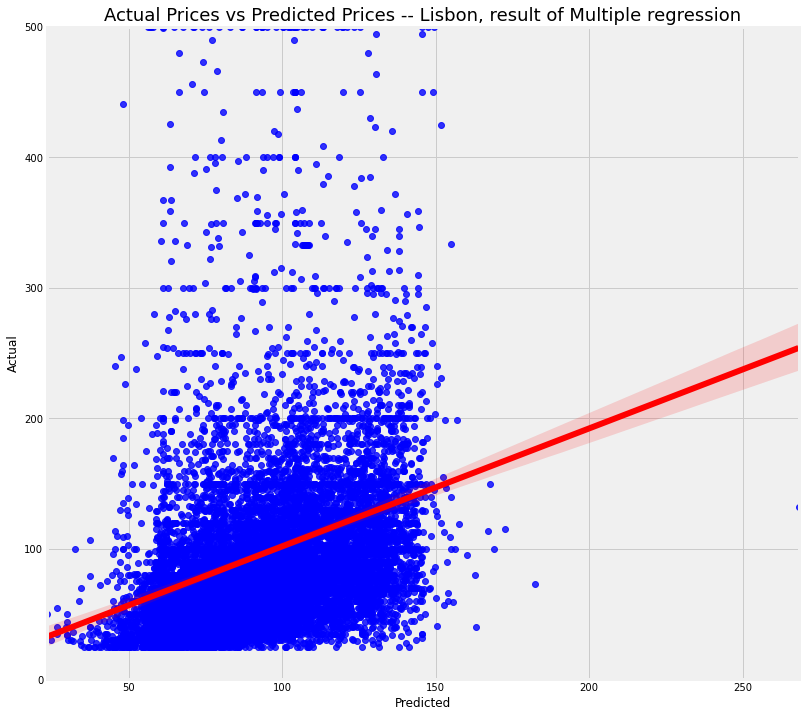

In [17]:
x = df_result['Predicted']
y = df_result['Actual']
fig = plt.figure(figsize=(12,12))
plt.title('Actual Prices vs Predicted Prices -- Lisbon, result of Multiple regression', fontsize=18)
plt.xlabel('Predicted €')
plt.ylabel('Actual €')
plt.ylim([0,500])
ax = sns.regplot(x,y, data=df_result,  scatter_kws={"color": "blue"}, line_kws={"color": "red"})
ax.figure.savefig('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/lisbon/airbnb_lisbon_multiple_regression.png')



In [18]:
df_result.shape

(14908, 3)

## The most mispriced [undervalued]

In [19]:
lisbon_mispriced = df_result.sort_values(by=['Diff'], ascending=False)
lisbon_mispriced['%'] = (lisbon_mispriced['Actual']/ lisbon_mispriced['Predicted'] -1) *100
lisbon_mispriced_perc = lisbon_mispriced.sort_values(by=['%'], ascending=True)
lisbon_mispriced_perc_plot = lisbon_mispriced_perc.loc[(lisbon_mispriced_perc['Predicted']>=1) & (lisbon_mispriced_perc['Diff']>= 1)]
lisbon_mispriced_perc_plot = lisbon_mispriced_perc_plot.sort_values(by=['%'],ascending=True)
lisbon_mispriced_perc_plot.head()
                                                             
                                                   

,Actual,Predicted,Diff,%
18511,25,141.428488,116.428488,-82.323222
17665,25,137.869560,112.869560,-81.866918
17328,25,131.369023,106.369023,-80.969639
17279,25,125.881056,100.881056,-80.139982
18024,28,140.339712,112.339712,-80.048413


In [20]:

lisbon_mispriced_1 = raw_df_lisbon.loc[raw_df_lisbon.id==827]
lisbon_mispriced_2 = raw_df_lisbon.loc[raw_df_lisbon.id==748]
lisbon_mispriced_3 = raw_df_lisbon.loc[raw_df_lisbon.index==1308]
lisbon_mispriced_4 = raw_df_lisbon.loc[raw_df_lisbon.index==1748]
lisbon_mispriced_5 = raw_df_lisbon.loc[raw_df_lisbon.index==894]

In [21]:
id_array = [18511, 17665, 17328, 17279, 18024]

lisbon_mispriced_query = raw_df_lisbon.query('index in @id_array')
lisbon_mispriced_query = lisbon_mispriced_query.rename({'index': 'id'}, axis=1)
lisbon_mispriced_query.shape
#lisbon_mispriced_query.head(1)

(5, 74)

In [22]:
#lisbon_mispriced_neg = raw_df_lisbon.loc[raw_df_lisbon.index==4119]
lisbon_mispriced_perc_1 = raw_df_lisbon.loc[raw_df_lisbon.id==7125]
lisbon_mispriced_perc_2 = raw_df_lisbon.loc[raw_df_lisbon.id==3679]
lisbon_mispriced_perc_3 = raw_df_lisbon.loc[raw_df_lisbon.id==8267]
lisbon_mispriced_perc_4 = raw_df_lisbon.loc[raw_df_lisbon.id==2483]
lisbon_mispriced_perc_5 = raw_df_lisbon.loc[raw_df_lisbon.id==3449]

In [23]:
lisbon_mispriced = lisbon_mispriced_query[['id','price','review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value','neighbourhood','listing_url']]
lisbon_mispriced_1 = lisbon_mispriced.rename({'review_scores_rating':'rating',
                                                    'review_scores_accuracy':'accuracy',
                                                    'review_scores_cleanliness':'cleanliness',
                                                    'review_scores_communication':'communication',
                                                    'review_scores_location':'location',
                                                    'review_scores_value':'value'}, axis=1)

lisbon_mispriced_1[:1]
lisbon_mispriced_1[:2]
lisbon_mispriced_1[:3]
lisbon_mispriced_1[:4]
lisbon_mispriced_1[:5]

,id,price,rating,accuracy,cleanliness,communication,location,value,neighbourhood,listing_url
17279,49683175,$71.00,5.0,5.0,5.0,5.0,4.5,5.0,"Lisboa, Portugal",https://www.airbnb.com/rooms/49683175
17328,49794671,$77.00,3.0,3.0,1.0,4.0,5.0,2.0,NaN,https://www.airbnb.com/rooms/49794671
17665,50475707,$101.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.airbnb.com/rooms/50475707
18024,51170851,$112.00,NaN,NaN,NaN,NaN,NaN,NaN,"Lisboa, Portugal",https://www.airbnb.com/rooms/51170851
18511,52274478,$53.00,NaN,NaN,NaN,NaN,NaN,NaN,"Lisboa, Portugal",https://www.airbnb.com/rooms/52274478


In [24]:
dfi.export(lisbon_mispriced_1,"/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/lisbon/airbnb_lisbon_mispriced.png")



## The best score

In [25]:
lisbon_high_value = df_result.sort_values(by=['Predicted'], ascending=False)
lisbon_high_value.head(6)

,Actual,Predicted,Diff
15789,132,268.206193,136.206193
15364,73,182.440340,109.440340
15476,115,172.599941,57.599941
18257,100,169.122709,69.122709
15712,150,167.539698,17.539698
8030,114,166.914942,52.914942


In [26]:
id_array = [15789, 15364, 15476, 18257, 15712]

lisbon_best_score_query = raw_df_lisbon.query('index in @id_array')
lisbon_best_score_query = lisbon_best_score_query.rename({'index': 'id'}, axis=1)
#lisbon_best_score_query.head(1)

In [27]:
lisbon_best_score = lisbon_best_score_query[['id','price','review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value','neighbourhood','listing_url']]
lisbon_best_score_1 = lisbon_best_score.rename({'review_scores_rating':'rating',
                                                    'review_scores_accuracy':'accuracy',
                                                    'review_scores_cleanliness':'cleanliness',
                                                    'review_scores_communication':'communication',
                                                    'review_scores_location':'location',
                                                    'review_scores_value':'value'}, axis=1)

lisbon_best_score_1[:1]
lisbon_best_score_1[:2]
lisbon_best_score_1[:3]
lisbon_best_score_1[:4]
lisbon_best_score_1[:5]

,id,price,rating,accuracy,cleanliness,communication,location,value,neighbourhood,listing_url
15364,43206521,$73.00,4.75,5.0,5.0,5.0,4.25,4.5,"Lisboa, Portugal",https://www.airbnb.com/rooms/43206521
15476,43562836,$115.00,4.00,3.0,5.0,5.0,5.00,3.0,NaN,https://www.airbnb.com/rooms/43562836
15712,44117217,$150.00,1.00,2.0,2.0,4.0,5.00,1.0,NaN,https://www.airbnb.com/rooms/44117217
15789,44259232,$132.00,4.50,4.5,4.5,5.0,5.00,4.5,NaN,https://www.airbnb.com/rooms/44259232
18257,51719582,$120.00,4.00,5.0,5.0,5.0,5.00,3.0,"Lisboa, Portugal",https://www.airbnb.com/rooms/51719582


In [28]:
dfi.export(lisbon_best_score_1,"/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/lisbon/airbnb_lisbon_best_score.png")


